In [7]:
import matplotlib.colors
import sklearn.datasets as dt
import matplotlib.pyplot as plt

import numpy as np

In [215]:
seed = 42
rand_state = 42

color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","cyan","magenta","blue"])

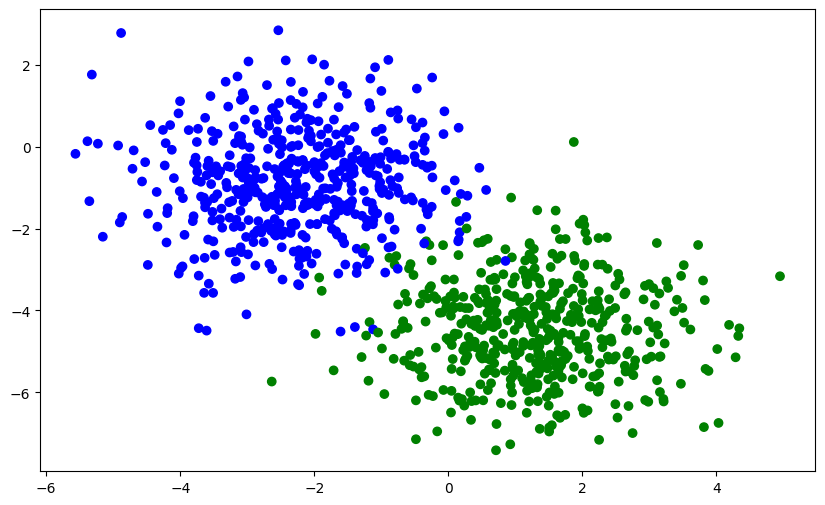

In [216]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))

x, y = dt.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.2, center_box=(5, -5), random_state=rand_state)

my_scatter_plot = plt.scatter(x[:,0],
                              x[:,1],
                              c=y,
                              vmin=min(y),
                              vmax=max(y),
                              cmap=color_map_discrete)
fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.show()

In [224]:
w0 = -4
w1 = 2.1
w2 = -2

# w0 = 0.124
# w1 = 4
# w2 = 2

w = np.array([w1, w2])

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')
print(f'w.shape: {w.shape}')

# Decision boundary
z = np.dot(w, x.transpose()) + w0

print(f'z.shape {z.shape}') 

# Map [-inf; inf] to [0:1]
sigmoid = 1 / (1 + np.exp(z))
print(f'sigmoid.shape {sigmoid.shape}') 


x.shape: (1000, 2)
y.shape: (1000,)
w.shape: (2,)
z.shape (1000,)
sigmoid.shape (1000,)


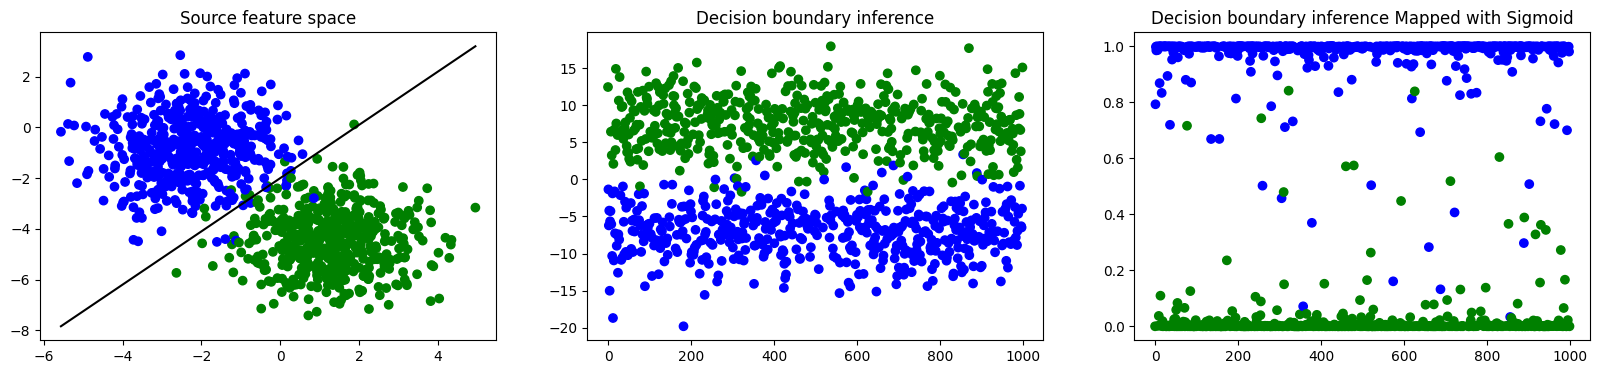

In [225]:
fig, axis = plt.subplots(nrows=1, ncols=3,figsize=(20,4))

axis[0].scatter(x[:,0],
                x[:,1],
                c=y,
                vmin=min(y),
                vmax=max(y),
                cmap=color_map_discrete)
w1 = w[0]
w2 = w[1]
xx = np.linspace(min(x[:, 0]), max(x[:, 0]))
yy = - (w0 / w2) - (w1*xx / w2)  

axis[0].plot(xx, yy, 'k-')
axis[0].set_title("Source feature space")

axis[1].scatter(list(range(len(z))),
                z,
                c=y,
                vmin=min(y),
                vmax=max(y),
                cmap=color_map_discrete)
axis[1].set_title("Decision boundary inference")

axis[2].scatter(list(range(len(sigmoid))),
                sigmoid,
                c=y,
                vmin=min(y),
                vmax=max(y),
                cmap=color_map_discrete)
axis[2].set_title("Decision boundary inference Mapped with Sigmoid")

fig.subplots_adjust(hspace=10,wspace=.2)
plt.show()

In [229]:
def mse_loss(y, y_hat):
    return np.mean(np.sqrt((y - y_hat)**2))

In [230]:
def ce_loss(y, y_hat, epsilon = 1e-20):
    return -np.mean(y_hat*np.log(y + epsilon) + (1-y_hat)*np.log(1 - y + epsilon))

In [211]:
x, y_hat = dt.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.2, center_box=(5, -5), random_state=rand_state)

weights = np.linspace(-15, 15)

ce_loss_list = []
mse_loss_list = []

for wi in weights:
    w0 = wi
    w1 = 2.1
    w2 = -2
    
    z = np.dot(w, x.transpose()) + w0
    y = 1 / (1 + np.exp(z))
    
    mse_loss_list.append(mse_loss(y=y, y_hat=y_hat))
    ce_loss_list.append(ce_loss(y=y, y_hat=y_hat))

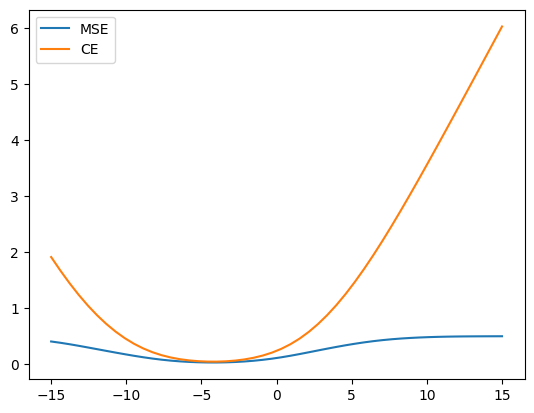

In [212]:
plt.plot(weights, mse_loss_list, label = "MSE")
plt.plot(weights, ce_loss_list, label = "CE")

plt.legend()
plt.show()